In [21]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
#https://www.kaggle.com/vik2012kvs/high-value-customers-identification

In [22]:
!pip install pystan fbprophet

In [23]:
import pandas as pd
from fbprophet import Prophet

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [31]:

data = pd.read_csv('Ecommerce.csv', encoding= 'unicode_escape')

In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [33]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [34]:
data['Unnamed: 8'].value_counts()

Series([], Name: Unnamed: 8, dtype: int64)

In [35]:
data['InvoiceDate'].value_counts()

3-Dec-17     5331
6-Dec-17     4940
27-Nov-17    4313
14-Nov-17    4195
9-Nov-17     4089
             ... 
11-Mar-17     537
17-Dec-16     522
29-Apr-17     452
20-Dec-16     291
4-Feb-17      279
Name: InvoiceDate, Length: 305, dtype: int64

In [36]:
data.describe()

,Quantity,UnitPrice,CustomerID,Unnamed: 8
count,541909.000000,541909.000000,406829.000000,0.0
mean,9.552250,4.611114,15287.690570,NaN
std,218.081158,96.759853,1713.600303,NaN
min,-80995.000000,-11062.060000,12346.000000,NaN
25%,1.000000,1.250000,13953.000000,NaN
50%,3.000000,2.080000,15152.000000,NaN
75%,10.000000,4.130000,16791.000000,NaN
max,80995.000000,38970.000000,18287.000000,NaN


In [37]:
data.drop(['Unnamed: 8'],axis=1,inplace = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [67]:
data['InvoiceDate'] =  pd.to_datetime(data['InvoiceDate'])

In [68]:
data['InvoiceDate']

0        2016-11-29
1        2016-11-29
2        2016-11-29
3        2016-11-29
4        2016-11-29
            ...    
541904   2017-12-07
541905   2017-12-07
541906   2017-12-07
541907   2017-12-07
541908   2017-12-07
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [78]:
data['Year'] = data['InvoiceDate'].apply(lambda x:str(x)[0:4])
data['Month'] = data['InvoiceDate'].apply(lambda x:str(x)[5:7])
data['Day'] = data['InvoiceDate'].apply(lambda x:str(x)[8:10])



In [74]:
data['Month'].unique()

array(['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10'], dtype=object)

In [75]:
data['Year'].unique()

array(['2016', '2017'], dtype=object)

In [79]:
data['Day'].unique()

array(['29', '30', '01', '03', '04', '05', '06', '07', '08', '10', '11',
       '12', '13', '14', '15', '17', '18', '19', '20', '21', '02', '09',
       '16', '22', '23', '24', '25', '26', '28', '31', '27'], dtype=object)

In [77]:
data.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day'],
      dtype=object)

In [81]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Month               0
Day                 0
dtype: int64

In [87]:
data.InvoiceDate.duplicated().sum()

541604

In [88]:
data['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C544080       1
C562122       1
560658        1
C566775       1
C539838       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [102]:
data['sales'] = data['UnitPrice']* data['Quantity']

In [101]:
data['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 541909, dtype: float64

In [103]:
data['sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: sales, Length: 541909, dtype: float64

In [213]:
y = data['sales']
ds = data['InvoiceDate']

In [214]:
salespred = pd.concat([y,ds],axis=1)

In [215]:
salespred = salespred.groupby(salespred['InvoiceDate'])['sales'].sum().reset_index(name='sales')

In [216]:
salespred

,InvoiceDate,sales
0,2016-11-29,58635.56
1,2016-11-30,46207.28
2,2016-12-01,45620.46
3,2016-12-03,31383.95
4,2016-12-04,53860.18
...,...,...
300,2017-12-03,57751.32
301,2017-12-04,54228.37
302,2017-12-05,75076.22
303,2017-12-06,81417.78


In [217]:
salespred.rename(columns={'sales': 'y', 'InvoiceDate': 'ds'},inplace=True)

# EDA

In [111]:
data['Year'].sort_values

<bound method Series.sort_values of 0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
541904    2017
541905    2017
541906    2017
541907    2017
541908    2017
Name: Year, Length: 541909, dtype: object>

In [112]:
data['Year']=data['Year'].astype('int')
data['Month']=data['Month'].astype('int')
data['Day']=data['Day'].astype('int')

In [233]:
year = data.groupby(data['Year'])['sales'].sum().reset_index(name='sales')

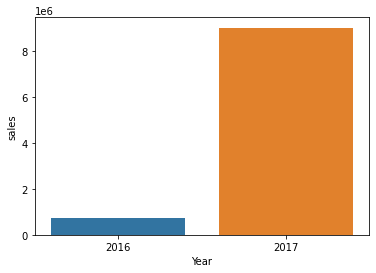

In [236]:
sns.barplot(data=year, x ='Year', y ='sales',estimator=sum)

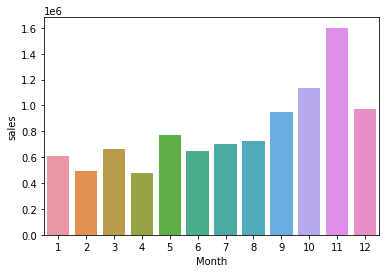

In [237]:
month = data.groupby(data['Month'])['sales'].sum().reset_index(name='sales')
sns.barplot(data=month, x ='Month', y ='sales',estimator=sum)

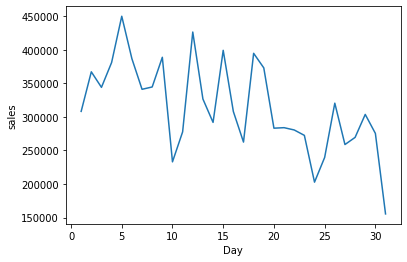

In [240]:
day = data.groupby(data['Day'])['sales'].sum().reset_index(name='sales')
sns.lineplot(data=day, x ='Day', y ='sales',estimator=sum)

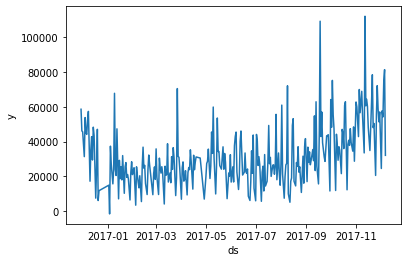

In [224]:
sns.lineplot(data=salespred, x ='ds', y ='y')




# Time series prediction

In [225]:
salespred 

,ds,y
0,2016-11-29,58635.56
1,2016-11-30,46207.28
2,2016-12-01,45620.46
3,2016-12-03,31383.95
4,2016-12-04,53860.18
...,...,...
300,2017-12-03,57751.32
301,2017-12-04,54228.37
302,2017-12-05,75076.22
303,2017-12-06,81417.78


In [226]:
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(salespred)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [227]:
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-29,52758.694145,7028.907459,54637.075551,52758.694145,52758.694145,-22717.702474,-22717.702474,-22717.702474,-23267.72018,-23267.72018,-23267.72018,550.017705,550.017705,550.017705,0.0,0.0,0.0,30040.991671
1,2016-11-30,52700.715359,13499.421348,59717.079111,52700.715359,52700.715359,-15663.184919,-15663.184919,-15663.184919,-23267.72018,-23267.72018,-23267.72018,7604.535260,7604.535260,7604.535260,0.0,0.0,0.0,37037.530439
2,2016-12-01,52642.736572,1857.243568,51251.611132,52642.736572,52642.736572,-25148.067061,-25148.067061,-25148.067061,-23267.72018,-23267.72018,-23267.72018,-1880.346881,-1880.346881,-1880.346881,0.0,0.0,0.0,27494.669511
3,2016-12-03,52526.779000,-8842.038720,35449.607160,52526.779000,52526.779000,-39352.618696,-39352.618696,-39352.618696,-23267.72018,-23267.72018,-23267.72018,-16084.898516,-16084.898516,-16084.898516,0.0,0.0,0.0,13174.160304
4,2016-12-04,52468.800213,6078.584795,53402.802196,52468.800213,52468.800213,-21993.326366,-21993.326366,-21993.326366,-23267.72018,-23267.72018,-23267.72018,1274.393814,1274.393814,1274.393814,0.0,0.0,0.0,30475.473847


In [228]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
665,2018-12-03,151201.867400,95165.197816,174602.498084,122257.893984,183824.274291,-17639.886583,-17639.886583,-17639.886583,-23267.72018,-23267.72018,-23267.72018,5627.833596,5627.833596,5627.833596,0.0,0.0,0.0,133561.980816
666,2018-12-04,151403.496384,91696.560831,169347.884128,122410.944436,184120.872893,-22717.702474,-22717.702474,-22717.702474,-23267.72018,-23267.72018,-23267.72018,550.017705,550.017705,550.017705,0.0,0.0,0.0,128685.793909
667,2018-12-05,151605.125368,99955.240368,175306.469752,122563.994889,184421.925156,-15663.184919,-15663.184919,-15663.184919,-23267.72018,-23267.72018,-23267.72018,7604.535260,7604.535260,7604.535260,0.0,0.0,0.0,135941.940448
668,2018-12-06,151806.754352,87805.526131,164223.209656,122655.992487,184785.919608,-25148.067061,-25148.067061,-25148.067061,-23267.72018,-23267.72018,-23267.72018,-1880.346881,-1880.346881,-1880.346881,0.0,0.0,0.0,126658.687291
669,2018-12-07,152008.383336,94043.519145,172475.349059,122733.932208,185131.209611,-20359.255157,-20359.255157,-20359.255157,-23267.72018,-23267.72018,-23267.72018,2908.465023,2908.465023,2908.465023,0.0,0.0,0.0,131649.128179


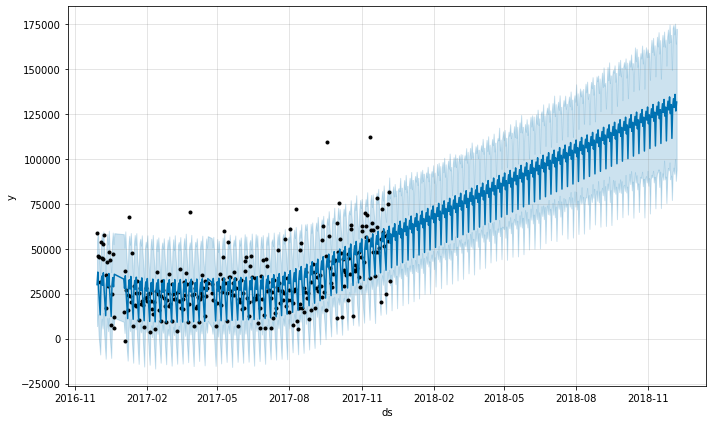

In [230]:
plot1 = m.plot(forecast)


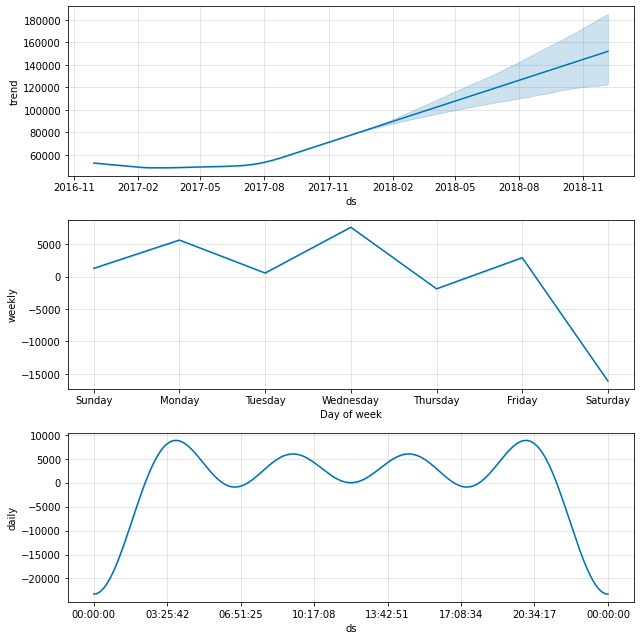

In [231]:
plot2=m.plot_components(forecast)